In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [28]:
df = pd.read_csv('test_scores.csv')

In [29]:
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [79]:
# Extract Features
x = df['math'].values
y = df['cs'].values

# normalize the values of x & y to prevent overflow
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

In [91]:
def gradient_descent(x, y, learning_rate=0.01, iteraions=10000, tolerance=1e-20):
  m = b = 0
  n = len(x)
  prev_cost = float('inf')
  for i in range(iteraions):
    y_pred = m * x + b
    cost = (1/n) * np.sum((y - y_pred) ** 2)

    if math.isclose(prev_cost, cost, rel_tol=tolerance):
      print(f'Stopped at iteration {i} with cost {cost}')
      break

    prev_cost = cost
    md = -(2/n) * np.sum(x * (y - y_pred))
    bd = -(2/n) * np.sum(y - y_pred)
    m -= learning_rate * md
    b -= learning_rate * bd
  return m, b

In [92]:
m_gd, b_gd = gradient_descent(x, y, learning_rate=0.01)
print(f'Gradient Descent: m {m_gd}, b {b_gd}')

Stopped at iteration 865 with cost 0.10094385427043276
Gradient Descent: m 0.9481856882762013, b -4.997668945350153e-16


In [82]:
model = LinearRegression()
model.fit(x.reshape(-1,1),y)

LinearRegression()

In [83]:
m_sklearn = model.coef_[0]
b_sklearn = model.intercept_
print(f'scikit-learn: m = {m_sklearn}, b = {b_sklearn}')

scikit-learn: m = 0.9481857126795196, b = -4.793551961477288e-16


In [93]:
print("Compare m:", math.isclose(m_gd, m_sklearn, rel_tol=1e-06))
print("Compare b:", math.isclose(b_gd, b_sklearn, rel_tol=1e-00))

Compare m: True
Compare b: True


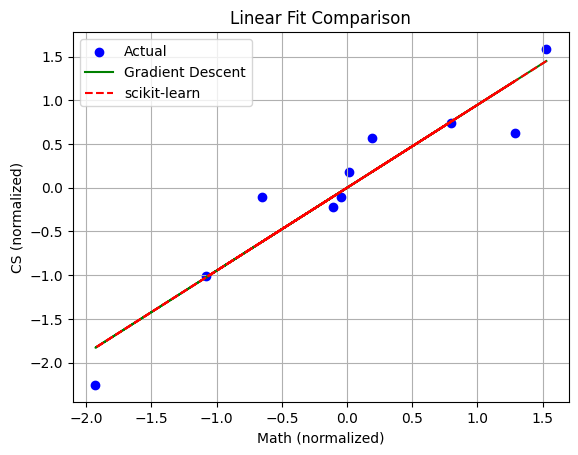

In [90]:
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, m_gd * x + b_gd, color='green', label='Gradient Descent')
plt.plot(x, m_sklearn * x + b_sklearn, color='red', linestyle='--', label='scikit-learn')
plt.xlabel("Math (normalized)")
plt.ylabel("CS (normalized)")
plt.title("Linear Fit Comparison")
plt.legend()
plt.grid(True)
plt.show()
